In [12]:
from QuantLib import *
import numpy as np

In [2]:
Settings.instance().evaluationDate = Date(10,November,2022)

In [5]:
#There are two ways of specifying reference dates for the term structure. The first is by means of an offset from the current
#evaulation date
helpers = [ SwapRateHelper(QuoteHandle(SimpleQuote(rate/100)),
                          Period(*tenor), TARGET(),
                          Annual, Unadjusted,
                          Actual360(), Euribor6M())
          for tenor, rate in [((2, Years),0.201),
                             ((3,Years), 0.258),
                             ((5,Years), 0.464),
                             ((10,Years),1.151),
                             ((15, Years), 1.588)]]

In [20]:
curve1 = PiecewiseFlatForward(0, TARGET(), helpers, Actual360())

In [36]:
#The second is to specify the reference dates directly
dates = [Date(10,11,2022),Date(10,11,2024),Date(10,11,2025),Date(10,11,2027),Date(10,11,2032),Date(16,11,2037)]
rates = [0.001977769487959405,0.001977769487959405, 0.003647551770429822, 
         0.007660760701396155, 0.018414773669626438, 0.025311634328225835]

print(len(dates), len(rates))

6 6


In [37]:
curve2 = ForwardCurve(dates,rates,Actual360())

In [38]:
print(curve1.referenceDate(), 'to', curve1.maxDate())
print(curve2.referenceDate(), 'to', curve2.maxDate())

November 10th, 2022 to November 16th, 2037
November 10th, 2022 to November 16th, 2037


In [39]:
print(curve1.zeroRate(5,Continuous))
print(curve2.zeroRate(5, Continuous))

0.458359 % Actual/360 continuous compounding
0.453905 % Actual/360 continuous compounding


In [40]:
%pylab inline --no-import-all
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


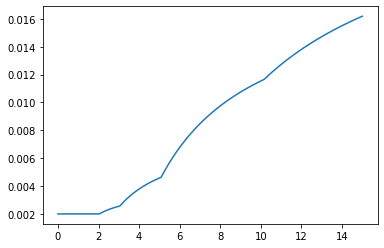

In [42]:
times = np.linspace(0.0,15,400)
rates = [curve1.zeroRate(t, Continuous).rate() for t in times]
plt.plot(times, rates)
pass

In [43]:
#What happens if we change the evaluation date
Settings.instance().evaluationDate = Date(9, December,2022)

In [44]:
#The range definition has changed for curve1 but not for curve2
print(curve1.referenceDate(), 'to', curve1.maxDate())
print(curve2.referenceDate(), 'to', curve2.maxDate())

December 9th, 2022 to December 14th, 2037
November 10th, 2022 to November 16th, 2037


In [45]:
#Ofcourse the rates changed to
print(curve1.zeroRate(5,Continuous))
print(curve2.zeroRate(5,Continuous))

0.458738 % Actual/360 continuous compounding
0.453905 % Actual/360 continuous compounding


In [46]:
#We can see how two curves behave differently with respect to notifications by making 2 observers
def make_observer(i):
    def say():
        s = "Observer %d notified" % i
        print('-'*len(s))
        print(s)
        print('-'*len(s))
    return Observer(say)

obs1 = make_observer(1)
obs2 = make_observer(2)

In [47]:
q1 = SimpleQuote(1)
obs1.registerWith(q1)

q2 = SimpleQuote(2)
obs2.registerWith(q2)

q3 = SimpleQuote(3)
obs1.registerWith(q3)
obs2.registerWith(q3)

In [48]:
q1.setValue(1.5)

-------------------
Observer 1 notified
-------------------


In [49]:
q2.setValue(1.9)

-------------------
Observer 2 notified
-------------------


In [50]:
q3.setValue(3.1)

-------------------
Observer 1 notified
-------------------
-------------------
Observer 2 notified
-------------------


In [51]:
obs1.registerWith(curve1)
obs2.registerWith(curve2)

In [53]:
Settings.instance().evaluationDate = Date(20, December, 2022)

-------------------
Observer 1 notified
-------------------
